In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix 
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
fraud1 = pd.read_csv('Fraud_check.csv')
fraud1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraud1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [5]:
fraud1.rename(columns={'Marital.Status':'MaritalStatus','Taxable.Income':'TaxableIncome','City.Population':'Population','Work.Experience':'Exp'},inplace=True)
fraud1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Undergrad      600 non-null    object
 1   MaritalStatus  600 non-null    object
 2   TaxableIncome  600 non-null    int64 
 3   Population     600 non-null    int64 
 4   Exp            600 non-null    int64 
 5   Urban          600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
fraud1.Undergrad.value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [7]:
fraud1.MaritalStatus.value_counts()

Single      217
Married     194
Divorced    189
Name: MaritalStatus, dtype: int64

In [8]:
fraud1.Urban.value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

C:\Users\Anup0\AppData\Local\Temp\ipykernel_17268\1907817965.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fraud1.corr(),vmax = 1,vmin=-1,annot=True,cmap='magma')


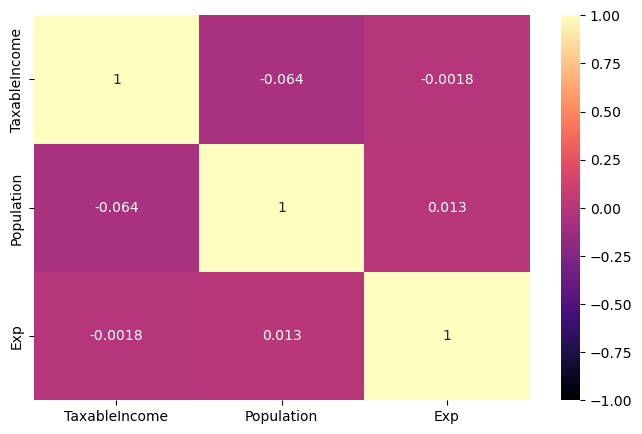

In [9]:
plt.figure(figsize=(8,5))
sns.heatmap(fraud1.corr(),vmax = 1,vmin=-1,annot=True,cmap='magma')
plt.show()

<Figure size 1200x1200 with 0 Axes>

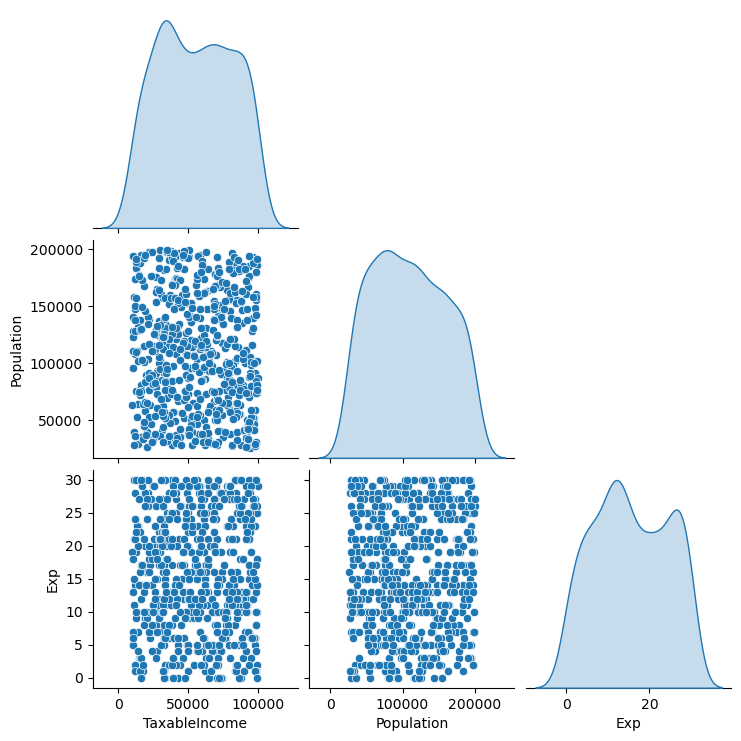

In [10]:
plt.figure(figsize=(12,12))
sns.pairplot(fraud1,diag_kind='kde',corner=True)
plt.show()

In [11]:
# Let's create new target variable TaxInc based on TaxableIncome and convert it into categorical:

fraud2 = fraud1.copy()

fraud2.insert(6,'TaxInc'," ")

for i in range(0,len(fraud2['TaxableIncome']),1):
    if fraud2['TaxableIncome'].iloc[i] <= 30000:
        fraud2['TaxInc'].iloc[i] = 'Risky'
    else:
        fraud2['TaxInc'].iloc[i] = 'Good'
        
        
fraud2.drop('TaxableIncome',axis=1,inplace=True) #Dropping TaxableIncome column
fraud2.head()

C:\Users\Anup0\AppData\Local\Temp\ipykernel_17268\2529526397.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud2['TaxInc'].iloc[i] = 'Good'
C:\Users\Anup0\AppData\Local\Temp\ipykernel_17268\2529526397.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud2['TaxInc'].iloc[i] = 'Risky'


,Undergrad,MaritalStatus,Population,Exp,Urban,TaxInc
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [12]:
fraud3 = fraud2[['Population','Exp']]
fraud3.head()

,Population,Exp
0,50047,10
1,134075,18
2,160205,30
3,193264,15
4,27533,28


In [13]:
#Standardize the data using Standard Scaler:
scaler = StandardScaler()
fraudx = scaler.fit_transform(fraud3)
fraud3 = pd.DataFrame(fraudx,columns=fraud3.columns)
fraud3.head()

,Population,Exp
0,-1.178521,-0.629143
1,0.508500,0.276370
2,1.033109,1.634639
3,1.696831,-0.063197
4,-1.630532,1.408261


In [14]:
fraud4 = fraud2.drop(['Population','Exp'],axis=1)
fraud4.head()

,Undergrad,MaritalStatus,Urban,TaxInc
0,NO,Single,YES,Good
1,YES,Divorced,YES,Good
2,NO,Married,YES,Good
3,YES,Single,YES,Good
4,NO,Married,NO,Good


In [15]:
fraud = pd.merge(fraud4, fraud3, left_index=True,right_index=True, how='left')
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Undergrad      600 non-null    object 
 1   MaritalStatus  600 non-null    object 
 2   Urban          600 non-null    object 
 3   TaxInc         600 non-null    object 
 4   Population     600 non-null    float64
 5   Exp            600 non-null    float64
dtypes: float64(2), object(4)
memory usage: 28.2+ KB


In [16]:
LE = LabelEncoder()
fraud['Undergrad']= LE.fit_transform(fraud['Undergrad'])
fraud['MaritalStatus']= LE.fit_transform(fraud['MaritalStatus'])
fraud['Urban']= LE.fit_transform(fraud['Urban'])
fraud['TaxInc']= LE.fit_transform(fraud['TaxInc'])

In [17]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Undergrad      600 non-null    int32  
 1   MaritalStatus  600 non-null    int32  
 2   Urban          600 non-null    int32  
 3   TaxInc         600 non-null    int32  
 4   Population     600 non-null    float64
 5   Exp            600 non-null    float64
dtypes: float64(2), int32(4)
memory usage: 18.9 KB


In [18]:
fraud['Undergrad']=fraud['Undergrad'].astype('category')
fraud['MaritalStatus']=fraud['MaritalStatus'].astype('category')
fraud['Urban']=fraud['Urban'].astype('category')
fraud['TaxInc']=fraud['TaxInc'].astype('category')
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Undergrad      600 non-null    category
 1   MaritalStatus  600 non-null    category
 2   Urban          600 non-null    category
 3   TaxInc         600 non-null    category
 4   Population     600 non-null    float64 
 5   Exp            600 non-null    float64 
dtypes: category(4), float64(2)
memory usage: 12.3 KB


In [19]:
# Let's split df into features and target:
y = fraud['TaxInc']
x = fraud.drop('TaxInc',axis=1)

In [20]:
# Let's further split X & y into train and test:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

## Decision Tree Model - Entropy Criteria

In [21]:
for i in range(2,20,1):
    model = DecisionTreeClassifier(criterion = 'entropy',random_state=42,max_depth=i)
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    print('For Max Depth :',i,' , the accuracy score for train dataset is : ',round(accuracy_score(y_train,y_train_pred),3))
    y_test_pred = model.predict(x_test)
    print('For Max Depth :',i,' , the accuracy score for test dataset is : ',round(accuracy_score(y_test,y_test_pred),3))
    print('\n')

For Max Depth : 2  , the accuracy score for train dataset is :  0.798
For Max Depth : 2  , the accuracy score for test dataset is :  0.778


For Max Depth : 3  , the accuracy score for train dataset is :  0.802
For Max Depth : 3  , the accuracy score for test dataset is :  0.789


For Max Depth : 4  , the accuracy score for train dataset is :  0.807
For Max Depth : 4  , the accuracy score for test dataset is :  0.767


For Max Depth : 5  , the accuracy score for train dataset is :  0.81
For Max Depth : 5  , the accuracy score for test dataset is :  0.778


For Max Depth : 6  , the accuracy score for train dataset is :  0.821
For Max Depth : 6  , the accuracy score for test dataset is :  0.8


For Max Depth : 7  , the accuracy score for train dataset is :  0.84
For Max Depth : 7  , the accuracy score for test dataset is :  0.756


For Max Depth : 8  , the accuracy score for train dataset is :  0.857
For Max Depth : 8  , the accuracy score for test dataset is :  0.744


For Max Depth : 9

In [22]:
model1 = DecisionTreeClassifier(criterion = 'entropy',random_state=42,max_depth=6)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

In [23]:
y_pred = model1.predict(x_train)
print(accuracy_score(y_train,y_pred))

0.8214285714285714


In [24]:
y_test_pred = model1.predict(x_test)
print(accuracy_score(y_test,y_test_pred))

0.8


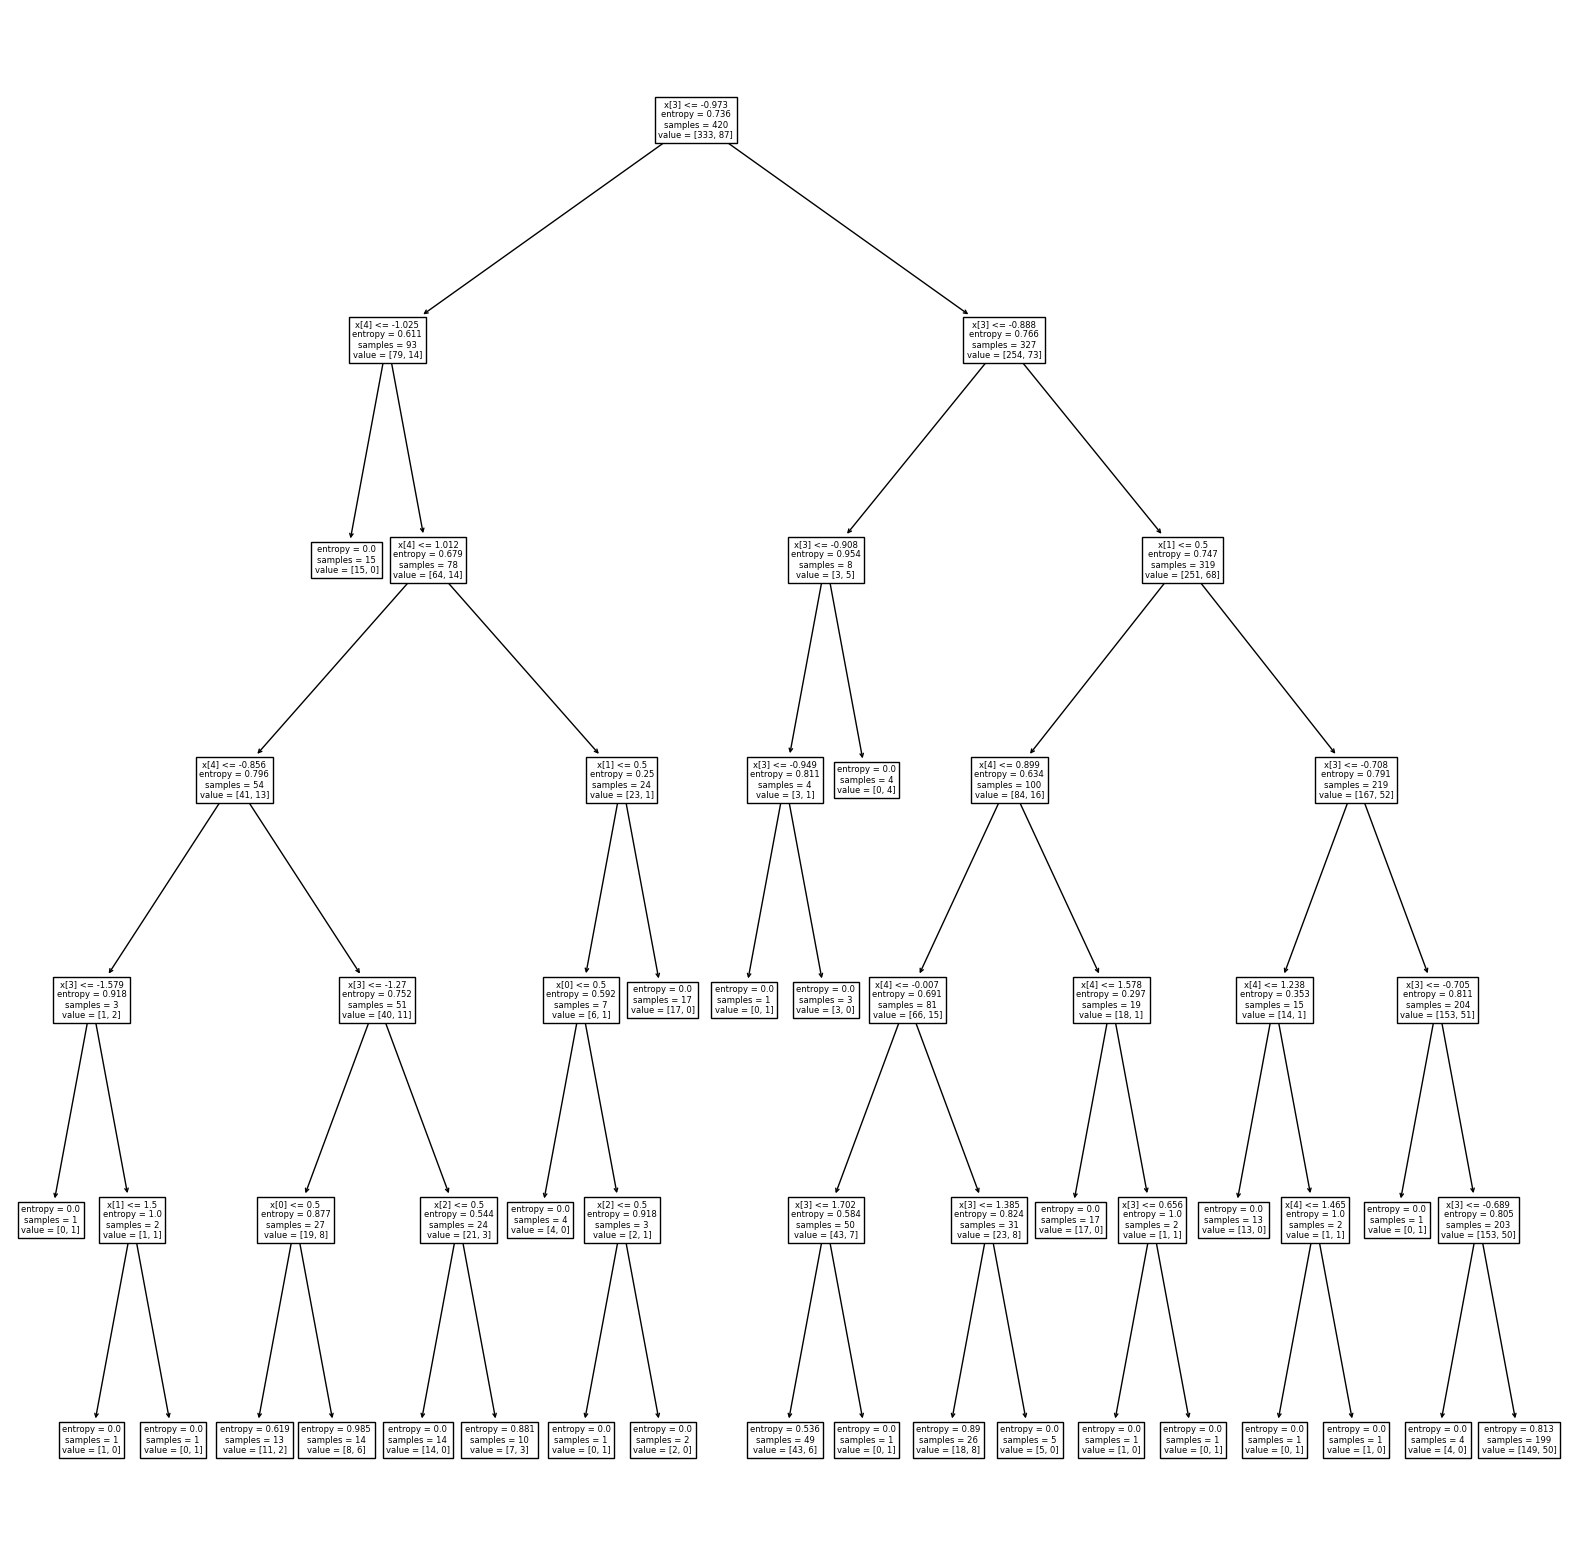

In [25]:
# Visualization of decision tree with max depth =3 :
plt.figure(figsize=(20,20))
plot_tree(model1)
plt.show()

In [26]:
classification_report(y_test,y_test_pred,output_dict=True)

{'0': {'precision': 0.8057142857142857,
  'recall': 0.986013986013986,
  'f1-score': 0.8867924528301886,
  'support': 143},
 '1': {'precision': 0.6,
  'recall': 0.08108108108108109,
  'f1-score': 0.14285714285714288,
  'support': 37},
 'accuracy': 0.8,
 'macro avg': {'precision': 0.7028571428571428,
  'recall': 0.5335475335475336,
  'f1-score': 0.5148247978436657,
  'support': 180},
 'weighted avg': {'precision': 0.7634285714285715,
  'recall': 0.8,
  'f1-score': 0.7338724168912847,
  'support': 180}}

In [27]:
confusion_matrix(y_test,y_test_pred)

array([[141,   2],
       [ 34,   3]], dtype=int64)

In [36]:
# Creating DF of feature names with features importance:
Imp_Features = pd.DataFrame(model1.feature_importances_,columns=["Important"],index=x.columns)
Imp_Feat = Imp_Features.sort_values(by = 'Important',ascending=False)
Imp_Feat

,Important
Population,0.440263
Exp,0.323099
Urban,0.104009
MaritalStatus,0.084804
Undergrad,0.047825


## Decision Tree Model - Gini Criteria

In [29]:
for i in range(2,20,1):
    model_g = DecisionTreeClassifier(criterion = 'gini',random_state=42,max_depth=i)
    model_g.fit(x_train,y_train)
    y_train_pred = model_g.predict(x_train)
    print('For Max Depth :',i,' , the accuracy score for train dataset is : ',round(accuracy_score(y_train,y_train_pred),3))
    y_test_pred = model_g.predict(x_test)
    print('For Max Depth :',i,' , the accuracy score for test dataset is : ',round(accuracy_score(y_test,y_test_pred),3))
    print('\n')

For Max Depth : 2  , the accuracy score for train dataset is :  0.798
For Max Depth : 2  , the accuracy score for test dataset is :  0.778


For Max Depth : 3  , the accuracy score for train dataset is :  0.805
For Max Depth : 3  , the accuracy score for test dataset is :  0.789


For Max Depth : 4  , the accuracy score for train dataset is :  0.807
For Max Depth : 4  , the accuracy score for test dataset is :  0.778


For Max Depth : 5  , the accuracy score for train dataset is :  0.812
For Max Depth : 5  , the accuracy score for test dataset is :  0.783


For Max Depth : 6  , the accuracy score for train dataset is :  0.833
For Max Depth : 6  , the accuracy score for test dataset is :  0.789


For Max Depth : 7  , the accuracy score for train dataset is :  0.838
For Max Depth : 7  , the accuracy score for test dataset is :  0.772


For Max Depth : 8  , the accuracy score for train dataset is :  0.864
For Max Depth : 8  , the accuracy score for test dataset is :  0.761


For Max Depth

In [30]:
model2 = DecisionTreeClassifier(criterion = 'gini',random_state=42,max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [31]:
y_pred = model2.predict(x_train)
print(accuracy_score(y_train,y_pred))

0.8047619047619048


In [32]:
y_test_pred = model2.predict(x_test)
print(accuracy_score(y_test,y_test_pred))

0.7888888888888889


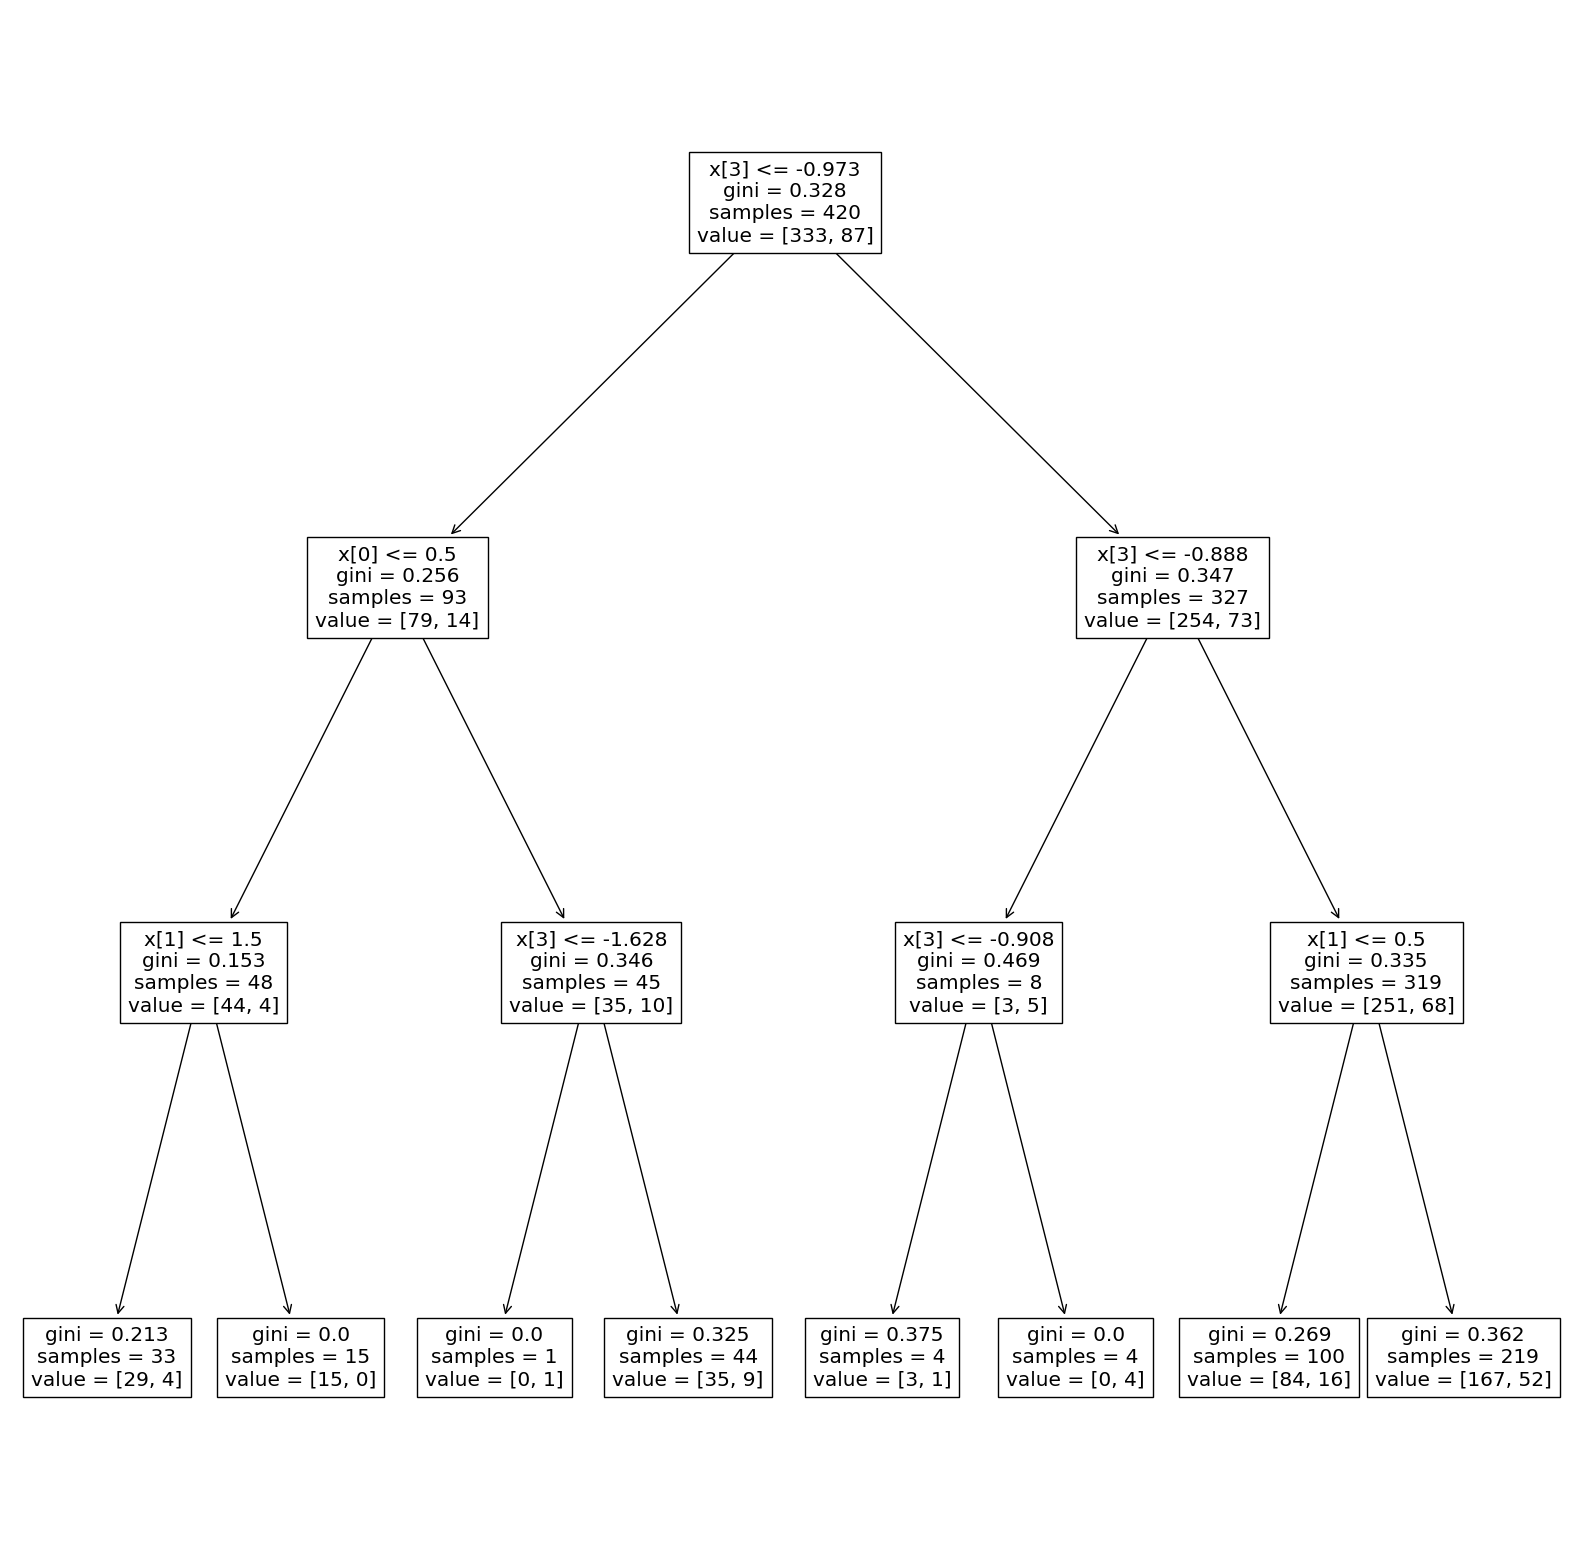

In [33]:
# Visualization:
plt.figure(figsize=(20,20))
plot_tree(model2)
plt.show()

In [34]:
classification_report(y_test,y_test_pred,output_dict=True)

{'0': {'precision': 0.7932960893854749,
  'recall': 0.993006993006993,
  'f1-score': 0.8819875776397516,
  'support': 143},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 37},
 'accuracy': 0.7888888888888889,
 'macro avg': {'precision': 0.39664804469273746,
  'recall': 0.4965034965034965,
  'f1-score': 0.4409937888198758,
  'support': 180},
 'weighted avg': {'precision': 0.630229671011794,
  'recall': 0.7888888888888889,
  'f1-score': 0.7006901311249137,
  'support': 180}}

In [35]:
confusion_matrix(y_test,y_test_pred)

array([[142,   1],
       [ 37,   0]], dtype=int64)